In [1]:
import sys
import os
from pathlib import Path

root_dir = Path(os.getcwd())

if str(root_dir.parents[1]) not in sys.path:
  sys.path.append(str(root_dir.parents[1]))


from LMORL.BAN.API.agents.DQNHybrid import DQNHybrid

import mo_gymnasium as mo_gym

env = mo_gym.make("mo-lunar-lander-v2", render_mode="rgb_array", max_episode_steps=500)

In [2]:

input_size = env.observation_space.shape[0]
num_actions = int(env.action_space.n)
action_space = list(range(env.action_space.n))
learning_rate = 0.001
epsilon_decay = 0.995
epsilon_min = 0.1
batch_size = 64
train_start = 1000
hidden_size = 128
BAN_SIZE = 3
max_memory_size=100000
use_clipping = True
clipping_tol = 1.0

agent = DQNHybrid(input_size=input_size, num_actions=num_actions,
                  action_space=action_space, learning_rate=learning_rate,
                  epsilon_decay=epsilon_decay, epsilon_min=epsilon_min,
                  batch_size=batch_size, hidden_size=hidden_size,
                  ban_size=BAN_SIZE, max_memory_size=max_memory_size, train_start=train_start, use_clipping=use_clipping, clipping_tol=clipping_tol)


16:35:11	Episode		timesteps:	118	Took	0.723105 sec - reward:	[-100.0, -39.830950409173965, -30.0]	


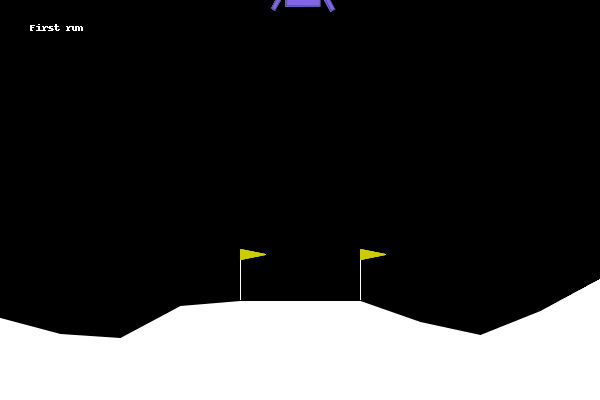

In [3]:
from IPython.display import Image as IpyImg

total_reward, num_timestep, elapsed_episode, animated_gif_file = agent.run_episode(env, title="First run", render=False)

display(IpyImg(data=animated_gif_file.getbuffer(), format='png'))

16:35:15	Episode	1	timesteps:	109	Took	1.261145 sec - reward:	[-100.0, -131.80617674603127, -24.0]	| 100AvgReward: [-100.0, -131.80617674603127, -24.0]
16:35:15	Episode	2	timesteps:	92	Took	0.251669 sec - reward:	[-100.0, 100.51443862915039, -15.0]	| 100AvgReward: [-100.0, -15.64586905844044, -19.5]
16:35:15	Episode	3	timesteps:	121	Took	0.294338 sec - reward:	[-100.0, -69.07423970010132, -29.0]	| 100AvgReward: [-100.0, -33.455325938994065, -22.666666666666668]
16:35:15	Episode	4	timesteps:	76	Took	0.180637 sec - reward:	[-100.0, -88.70257161557674, -14.0]	| 100AvgReward: [-100.0, -47.267137358139735, -20.5]
16:35:16	Episode	5	timesteps:	104	Took	0.252246 sec - reward:	[-100.0, -226.74667071225122, -31.0]	| 100AvgReward: [-100.0, -83.16304402896203, -22.6]
16:35:16	Episode	6	timesteps:	68	Took	0.16491 sec - reward:	[-100.0, 191.79815056547523, -18.0]	| 100AvgReward: [-100.0, -37.336178263222486, -21.833333333333332]
16:35:16	Episode	7	timesteps:	92	Took	0.241264 sec - reward:	[-100.0, 

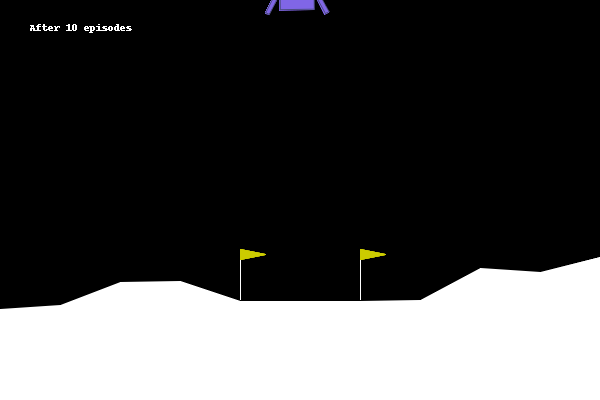

In [4]:
from IPython.display import Image as IpyImg

EPISODES = 10
REPLAY_FREQUENCY=4
mname = "fooo.model"
VERBOSE = True

def early_stopping(avg_reward : list) -> bool:
    if(sum(avg_reward) > 200):  ##if(avg_reward[0] >= 100):
        return True
    return False

total_rewards = []
total_avg_rewards   = []
total_timings = []

rewards, avg_rewards, timings, infos_lists = agent.learning(env=env,episodes=EPISODES, early_stopping=early_stopping, replay_frequency=REPLAY_FREQUENCY, mname=mname, verbose=VERBOSE)

total_rewards += rewards
total_avg_rewards += avg_rewards
total_timings += timings

title=f"After {EPISODES} episodes"
total_reward, num_timestep, elapsed_episode, animated_gif_file = agent.run_episode(env, title=title, render=False, verbose=False)
display(IpyImg(data=animated_gif_file.getbuffer(), format='png'))

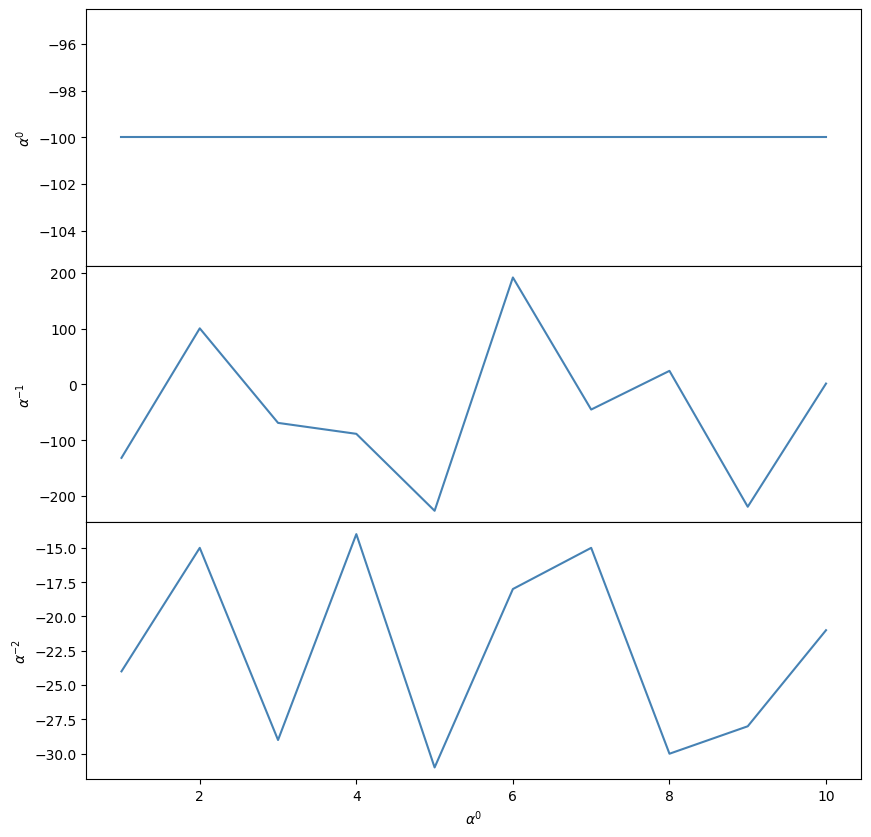

<Figure size 640x480 with 0 Axes>

In [5]:
from LMORL.BAN.API.ban_utils import Ban

%matplotlib inline

r = Ban.display_plot(total_rewards, len(total_rewards), "Total rewards", use_BanPlots=True)

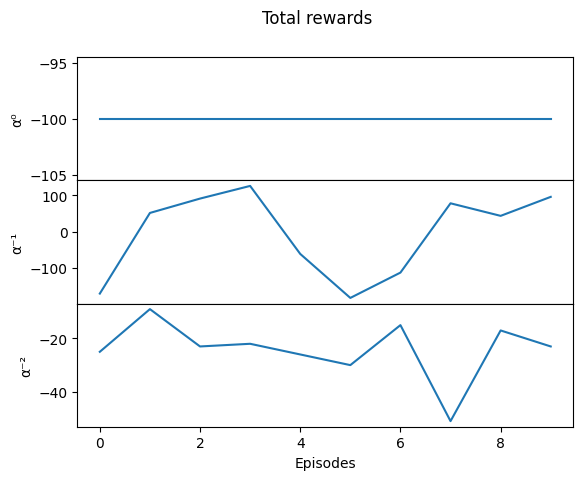

In [ ]:
from LMORL.BAN.API.ban_utils import Ban

%matplotlib inline

r = Ban.display_plot(total_rewards, len(total_rewards), "Total rewards", use_BanPlots=False)

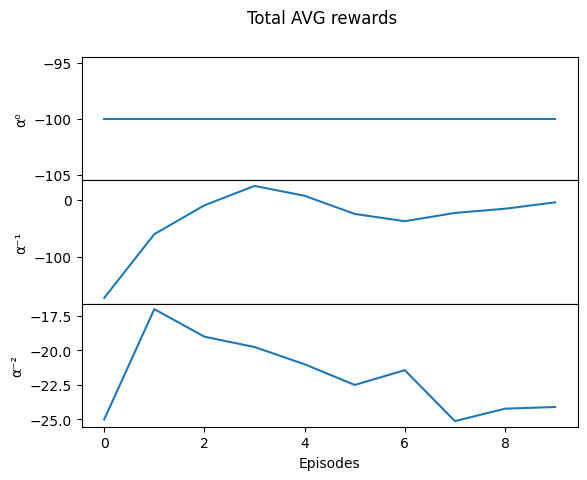

In [ ]:
r = Ban.display_plot(total_avg_rewards, len(total_avg_rewards), "Total AVG rewards")

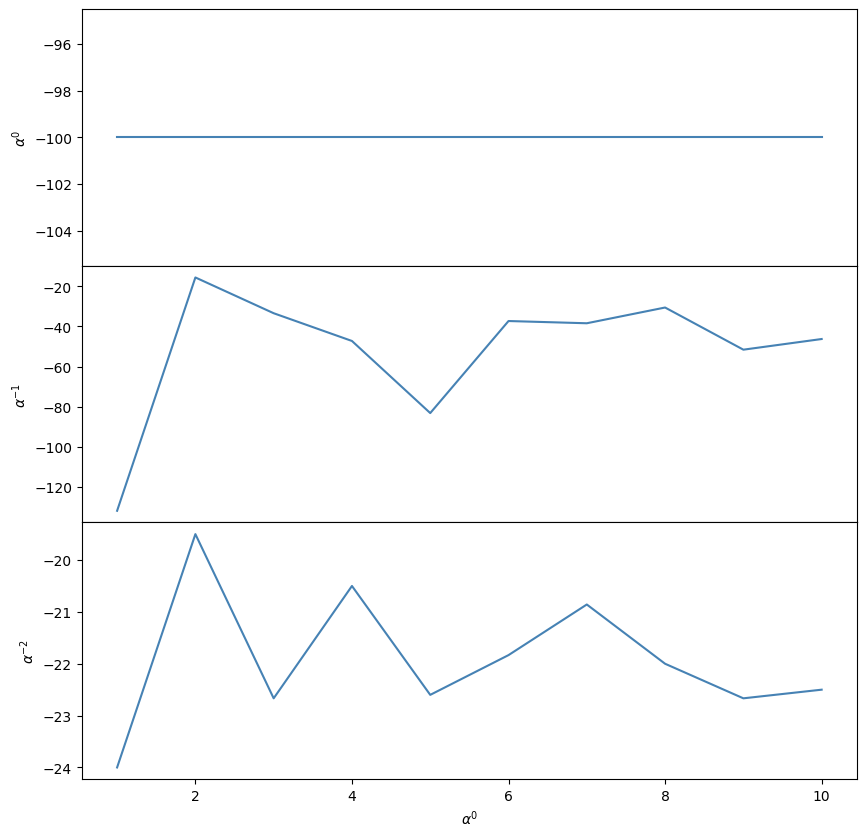

<Figure size 640x480 with 0 Axes>

In [9]:
r = Ban.display_plot(total_avg_rewards, len(total_avg_rewards), "Total AVG rewards", use_BanPlots=True)